In [36]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

In [45]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [47]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 2., 1., 0., 5.])

In [48]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts/1000

tensor([0.1840, 0.1730, 0.1780, 0.1340, 0.1710, 0.1600])

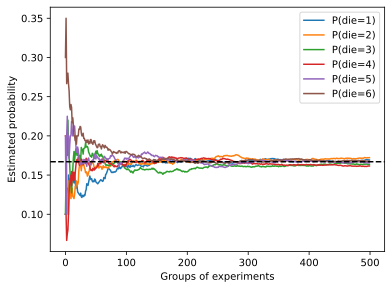

In [51]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();